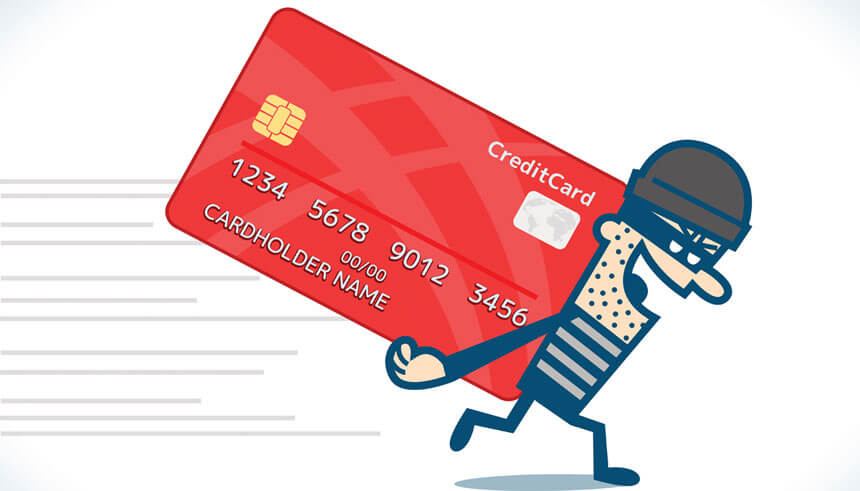

In [1]:
from IPython.display import Image
Image("Credit-card-fraud.jpg")

**Context**
It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.






**Content**
The datasets contains transactions made by credit cards in September 2013 by european cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

**Inspiration**
Identify fraudulent credit card transactions.

Given the class imbalance ratio, we recommend measuring the accuracy using the Area Under the Precision-Recall Curve (AUPRC). Confusion matrix accuracy is not meaningful for unbalanced classification.

**Acknowledgements**
The dataset has been collected and analysed during a research collaboration of Worldline and the Machine Learning Group (http://mlg.ulb.ac.be) of ULB (Université Libre de Bruxelles) on big data mining and fraud detection.
More details on current and past projects on related topics are available on https://www.researchgate.net/project/Fraud-detection-5 and the page of the DefeatFraud project

**Please cite the following works:**

Andrea Dal Pozzolo, Olivier Caelen, Reid A. Johnson and Gianluca Bontempi. Calibrating Probability with Undersampling for Unbalanced Classification. In Symposium on Computational Intelligence and Data Mining (CIDM), IEEE, 2015

Dal Pozzolo, Andrea; Caelen, Olivier; Le Borgne, Yann-Ael; Waterschoot, Serge; Bontempi, Gianluca. Learned lessons in credit card fraud detection from a practitioner perspective, Expert systems with applications,41,10,4915-4928,2014, Pergamon

Dal Pozzolo, Andrea; Boracchi, Giacomo; Caelen, Olivier; Alippi, Cesare; Bontempi, Gianluca. Credit card fraud detection: a realistic modeling and a novel learning strategy, IEEE transactions on neural networks and learning systems,29,8,3784-3797,2018,IEEE

Dal Pozzolo, Andrea Adaptive Machine learning for credit card fraud detection ULB MLG PhD thesis (supervised by G. Bontempi)

Carcillo, Fabrizio; Dal Pozzolo, Andrea; Le Borgne, Yann-Aël; Caelen, Olivier; Mazzer, Yannis; Bontempi, Gianluca. Scarff: a scalable framework for streaming credit card fraud detection with Spark, Information fusion,41, 182-194,2018,Elsevier

Carcillo, Fabrizio; Le Borgne, Yann-Aël; Caelen, Olivier; Bontempi, Gianluca. Streaming active learning strategies for real-life credit card fraud detection: assessment and visualization, International Journal of Data Science and Analytics, 5,4,285-300,2018,Springer International Publishing

Bertrand Lebichot, Yann-Aël Le Borgne, Liyun He, Frederic Oblé, Gianluca Bontempi Deep-Learning Domain Adaptation Techniques for Credit Cards Fraud Detection, INNSBDDL 2019: Recent Advances in Big Data and Deep Learning, pp 78-88, 2019

Fabrizio Carcillo, Yann-Aël Le Borgne, Olivier Caelen, Frederic Oblé, Gianluca Bontempi Combining Unsupervised and Supervised Learning in Credit Card Fraud Detection Information Sciences, 2019

# **Lets start with importing the library!**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
%matplotlib inline

# Reading the dataset

In [3]:
#Reading dataset

data = pd.read_csv('creditcard.csv')
print(data.head())

print(data['Class'].value_counts()[0])

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


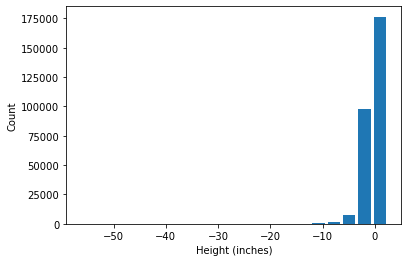

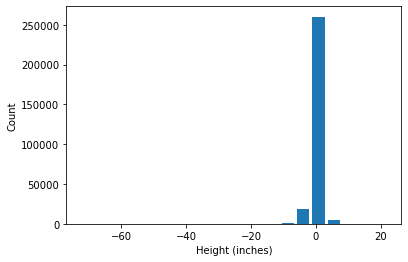

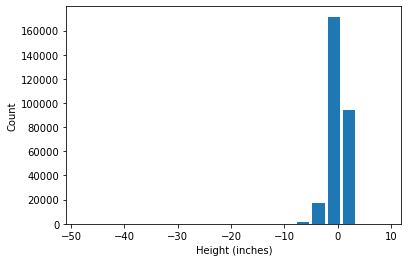

In [6]:
plt.hist(data.V1, bins=20, rwidth=0.8)
plt.xlabel('Height (inches)')
plt.ylabel('Count')
plt.show()

plt.hist(data.V2, bins=20, rwidth=0.8)
plt.xlabel('Height (inches)')
plt.ylabel('Count')
plt.show()

plt.hist(data.V3, bins=20, rwidth=0.8)
plt.xlabel('Height (inches)')
plt.ylabel('Count')
plt.show()

As we can see, the distribution of features are not normalize.

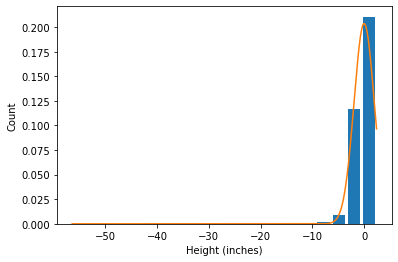

In [7]:
from scipy.stats import norm
import numpy as np
plt.hist(data.V1, bins=20, rwidth=0.8, density=True)
plt.xlabel('Height (inches)')
plt.ylabel('Count')

rng = np.arange(data.V1.min(), data.V1.max(), 0.1)
plt.plot(rng, norm.pdf(rng,data.V1.mean(),data.V1.std()))

The data used to be similiarly with that orange line which the normalize distribution.

<AxesSubplot:xlabel='V6'>

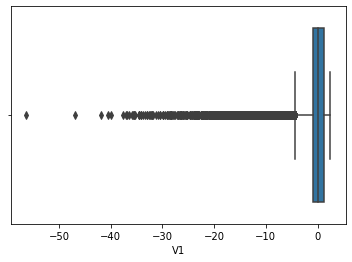

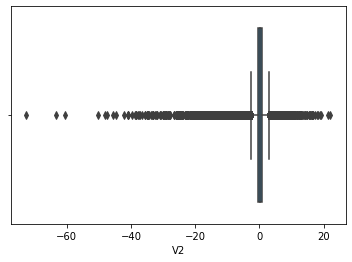

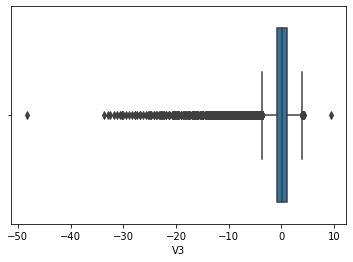

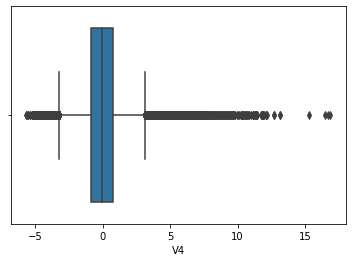

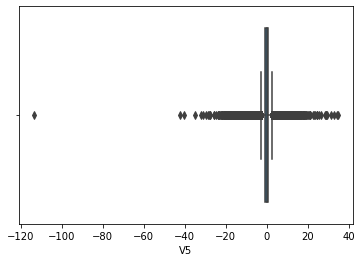

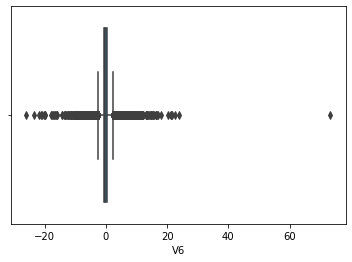

In [8]:
plt.figure(figsize=(6,4))
sns.boxplot(data=data, x='V1')

plt.figure(figsize=(6,4))
sns.boxplot(data=data, x='V2')

plt.figure(figsize=(6,4))
sns.boxplot(data=data, x='V3')

plt.figure(figsize=(6,4))
sns.boxplot(data=data, x='V4')

plt.figure(figsize=(6,4))
sns.boxplot(data=data, x='V5')

plt.figure(figsize=(6,4))
sns.boxplot(data=data, x='V6')

As we can see, there's a lot of outliers in the features. So, we have to clean this all.

# Checking the Missing Value

Lets checking NaN presence

In [9]:
# Checking Nan presence

[print(nol) for nol in data if data[nol].isna().sum()>0]
print(data.isna().sum())

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


There is'nt any Nan Presence

**Checking the duplicated the dataset**

In [10]:
#Checking duplicated dataset
data.duplicated()

#Removing duplicated dataset
data.drop_duplicates(keep='first', inplace=True)

#Recheck duplicated dataset
data.duplicated().sum()

0

# Visualization Distribution of Dataset

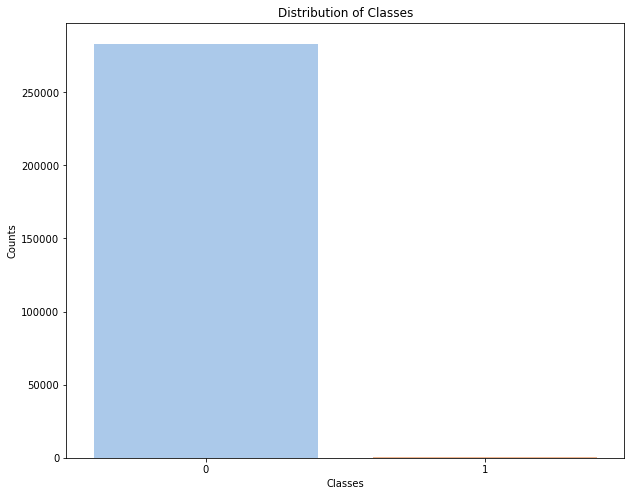

In [11]:
plt.figure(figsize=(10,8))

x_axis = data.value_counts('Class').index
y_axis = data.value_counts('Class').values

sns.barplot(x = x_axis, y = y_axis, palette='pastel')
plt.title('Distribution of Classes')
plt.xlabel('Classes')
plt.ylabel('Counts')
plt.show()

The distribution of class that define fraud or not fraud is not balanced. Let's scaling the data with sklearn's algorithms!

In [12]:
#Checking distribution of Fraud

print(data['Class'].value_counts())
print('-'*50)

print('Fraud detections :', round(data['Class'].value_counts()[0]/len(data)*100, 2), '% of the dataset')
print('Fraud detections :', round(data['Class'].value_counts()[1]/len(data)*100, 2),'% of the dataset')


#Define features and label
X = data.copy()
y = data['Class']

#training with StratifiedKFold
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits = 2, random_state=None, shuffle=False)

for train_index, test_index in skf.split(X,y) :
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

#Turn into array
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

#See the similiarity between the train and test of label
train_unique_label, train_counts_label = np.unique(y_train, return_counts=True)
test_unique_label, test_counts_label = np.unique(y_test, return_counts=True)
print('-'*50)

#Lets see the label distribution
print('\n Label Distribution :')
print(train_counts_label/len(y_train))
print(test_counts_label/len(y_test))

0    283253
1       473
Name: Class, dtype: int64
--------------------------------------------------
Fraud detections : 99.83 % of the dataset
Fraud detections : 0.17 % of the dataset
--------------------------------------------------

 Label Distribution :
[0.99833642 0.00166358]
[0.99832937 0.00167063]


In [13]:
#Lets shuffle befor creating subplot

df = data.sample(frac=1)

# amount of fraud class 492 rows
#why 492? see on data.value_counts()[1] : theres 492 rows of fraud datas.

unfraud_df = df.loc[data['Class'] == 1]
fraud_df = df.loc[data['Class'] == 0][:473]

normal_distributed_df = pd.concat([unfraud_df, fraud_df])

# Shuffle dataframe rows
new_df = normal_distributed_df.sample(frac=1, random_state=0)

new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 946 entries, 154357 to 161423
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    946 non-null    float64
 1   V1      946 non-null    float64
 2   V2      946 non-null    float64
 3   V3      946 non-null    float64
 4   V4      946 non-null    float64
 5   V5      946 non-null    float64
 6   V6      946 non-null    float64
 7   V7      946 non-null    float64
 8   V8      946 non-null    float64
 9   V9      946 non-null    float64
 10  V10     946 non-null    float64
 11  V11     946 non-null    float64
 12  V12     946 non-null    float64
 13  V13     946 non-null    float64
 14  V14     946 non-null    float64
 15  V15     946 non-null    float64
 16  V16     946 non-null    float64
 17  V17     946 non-null    float64
 18  V18     946 non-null    float64
 19  V19     946 non-null    float64
 20  V20     946 non-null    float64
 21  V21     946 non-null    float64

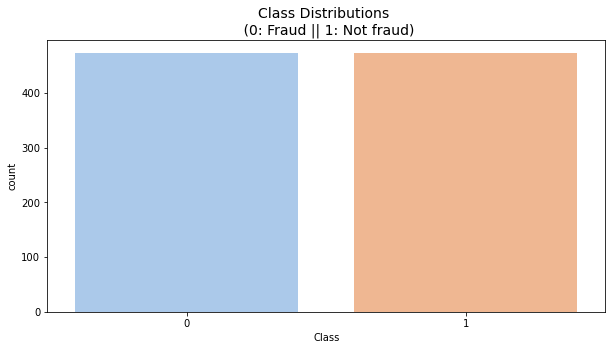

In [14]:
plt.figure(figsize = (10,5))
sns.countplot(new_df['Class'], palette='pastel')
plt.title('Class Distributions \n (0: Fraud || 1: Not fraud)', fontsize=14)
plt.show()

In [15]:
# Outliers removal function

def outliers_removal(feature,feature_name,dataset):
    
    # Identify 25th & 75th quartiles

    q25, q75 = np.percentile(feature, 25), np.percentile(feature, 75)
    print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75))
    feat_iqr = q75 - q25
    print('iqr: {}'.format(feat_iqr))
    
    feat_cut_off = feat_iqr * 1.5
    feat_lower, feat_upper = q25 - feat_cut_off, q75 + feat_cut_off
    print('Cut Off: {}'.format(feat_cut_off))
    print(feature_name +' Lower: {}'.format(feat_lower))
    print(feature_name +' Upper: {}'.format(feat_upper))
    
    outliers = [x for x in feature if x < feat_lower or x > feat_upper]
    print(feature_name + ' outliers for close to crediat card fraud cases: {}'.format(len(outliers)))
    #print(feature_name + ' outliers:{}'.format(outliers))

    dataset = dataset.drop(dataset[(dataset[feature_name] > feat_upper) | (dataset[feature_name] < feat_lower)].index)
    print('-' * 65)
    
    return dataset

new_df = outliers_removal(data['V1'],'V1', data)
new_df = outliers_removal(data['V2'],'V2', data)
new_df = outliers_removal(data['V3'],'V3', data)
new_df = outliers_removal(data['V4'],'V4', data)
new_df = outliers_removal(data['V5'],'V5', data)
new_df = outliers_removal(data['V6'],'V6', data)
new_df = outliers_removal(data['V7'],'V7', data)
new_df = outliers_removal(data['V8'],'V8', data)
new_df = outliers_removal(data['V9'],'V9', data)
new_df = outliers_removal(data['V10'],'V10', data)
new_df = outliers_removal(data['V11'],'V11', data)
new_df = outliers_removal(data['V12'],'V12', data)
new_df = outliers_removal(data['V13'],'V13', data)
new_df = outliers_removal(data['V14'],'V14', data)
new_df = outliers_removal(data['V15'],'V15', data)
new_df = outliers_removal(data['V16'],'V16', data)
new_df = outliers_removal(data['V17'],'V17', data)
new_df  = outliers_removal(data['V18'],'V18', data)
new_df  = outliers_removal(data['V19'],'V19', data)
new_df = outliers_removal(data['V20'],'V20', data)
new_df = outliers_removal(data['V21'],'V21', data)
new_df = outliers_removal(data['V22'],'V22', data)
new_df = outliers_removal(data['V23'],'V23', data)
new_df = outliers_removal(data['V24'],'V24', data)
new_df = outliers_removal(data['V25'],'V25', data)
new_df = outliers_removal(data['V26'],'V26', data)
new_df = outliers_removal(data['V27'],'V27', data)
new_df = outliers_removal(data['V28'],'V28', data)


Quartile 25: -0.9159513307412135 | Quartile 75: 1.31606775368132
iqr: 2.232019084422533
Cut Off: 3.3480286266337997
V1 Lower: -4.263979957375013
V1 Upper: 4.66409638031512
V1 outliers for close to crediat card fraud cases: 6948
-----------------------------------------------------------------
Quartile 25: -0.6003205657226367 | Quartile 75: 0.8002828928387605
iqr: 1.4006034585613971
Cut Off: 2.1009051878420957
V2 Lower: -2.7012257535647324
V2 Upper: 2.901188080680856
V2 outliers for close to crediat card fraud cases: 13390
-----------------------------------------------------------------
Quartile 25: -0.8896820047070664 | Quartile 75: 1.0269599742860676
iqr: 1.916641978993134
Cut Off: 2.874962968489701
V3 Lower: -3.7646449731967673
V3 Upper: 3.9019229427757685
V3 outliers for close to crediat card fraud cases: 3306
-----------------------------------------------------------------
Quartile 25: -0.8501344664392158 | Quartile 75: 0.7396469644832829
iqr: 1.5897814309224987
Cut Off: 2.384672

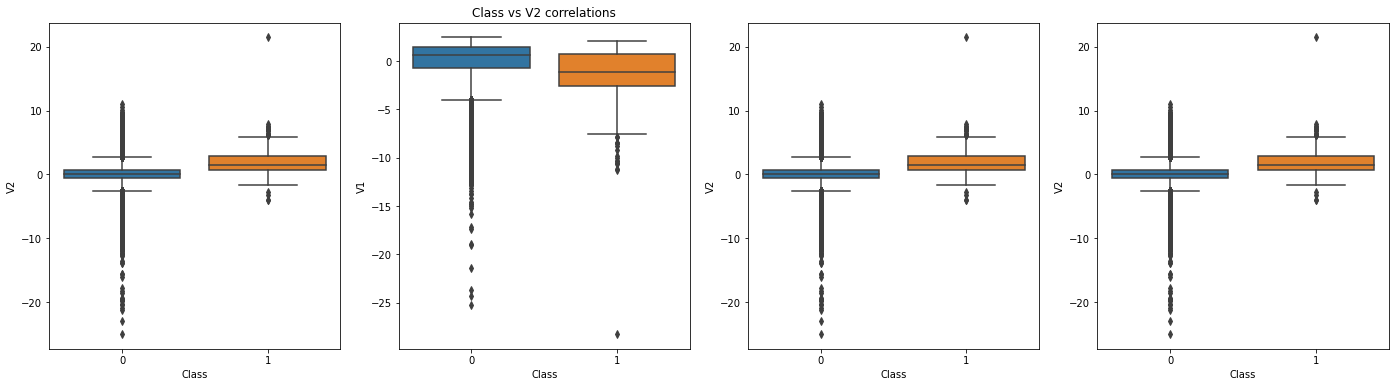

In [16]:
# Plotting features with an interesting correlation

f, axes = plt.subplots(ncols=4, figsize=(24,6))


sns.boxplot(x='Class', y='V1', data=new_df, ax=axes[1]) 
axes[1].set_title('Class vs V1 correlations')

sns.boxplot(x='Class', y='V2', data=new_df, ax=axes[2]) 
axes[1].set_title('Class vs V2 correlations')

sns.boxplot(x='Class', y='V2', data=new_df, ax=axes[3]) 
axes[1].set_title('Class vs V2 correlations')

sns.boxplot(x='Class', y='V2', data=new_df, ax=axes[0]) 
axes[1].set_title('Class vs V2 correlations') 


plt.show()

# EDA & VISUALIZATIONS

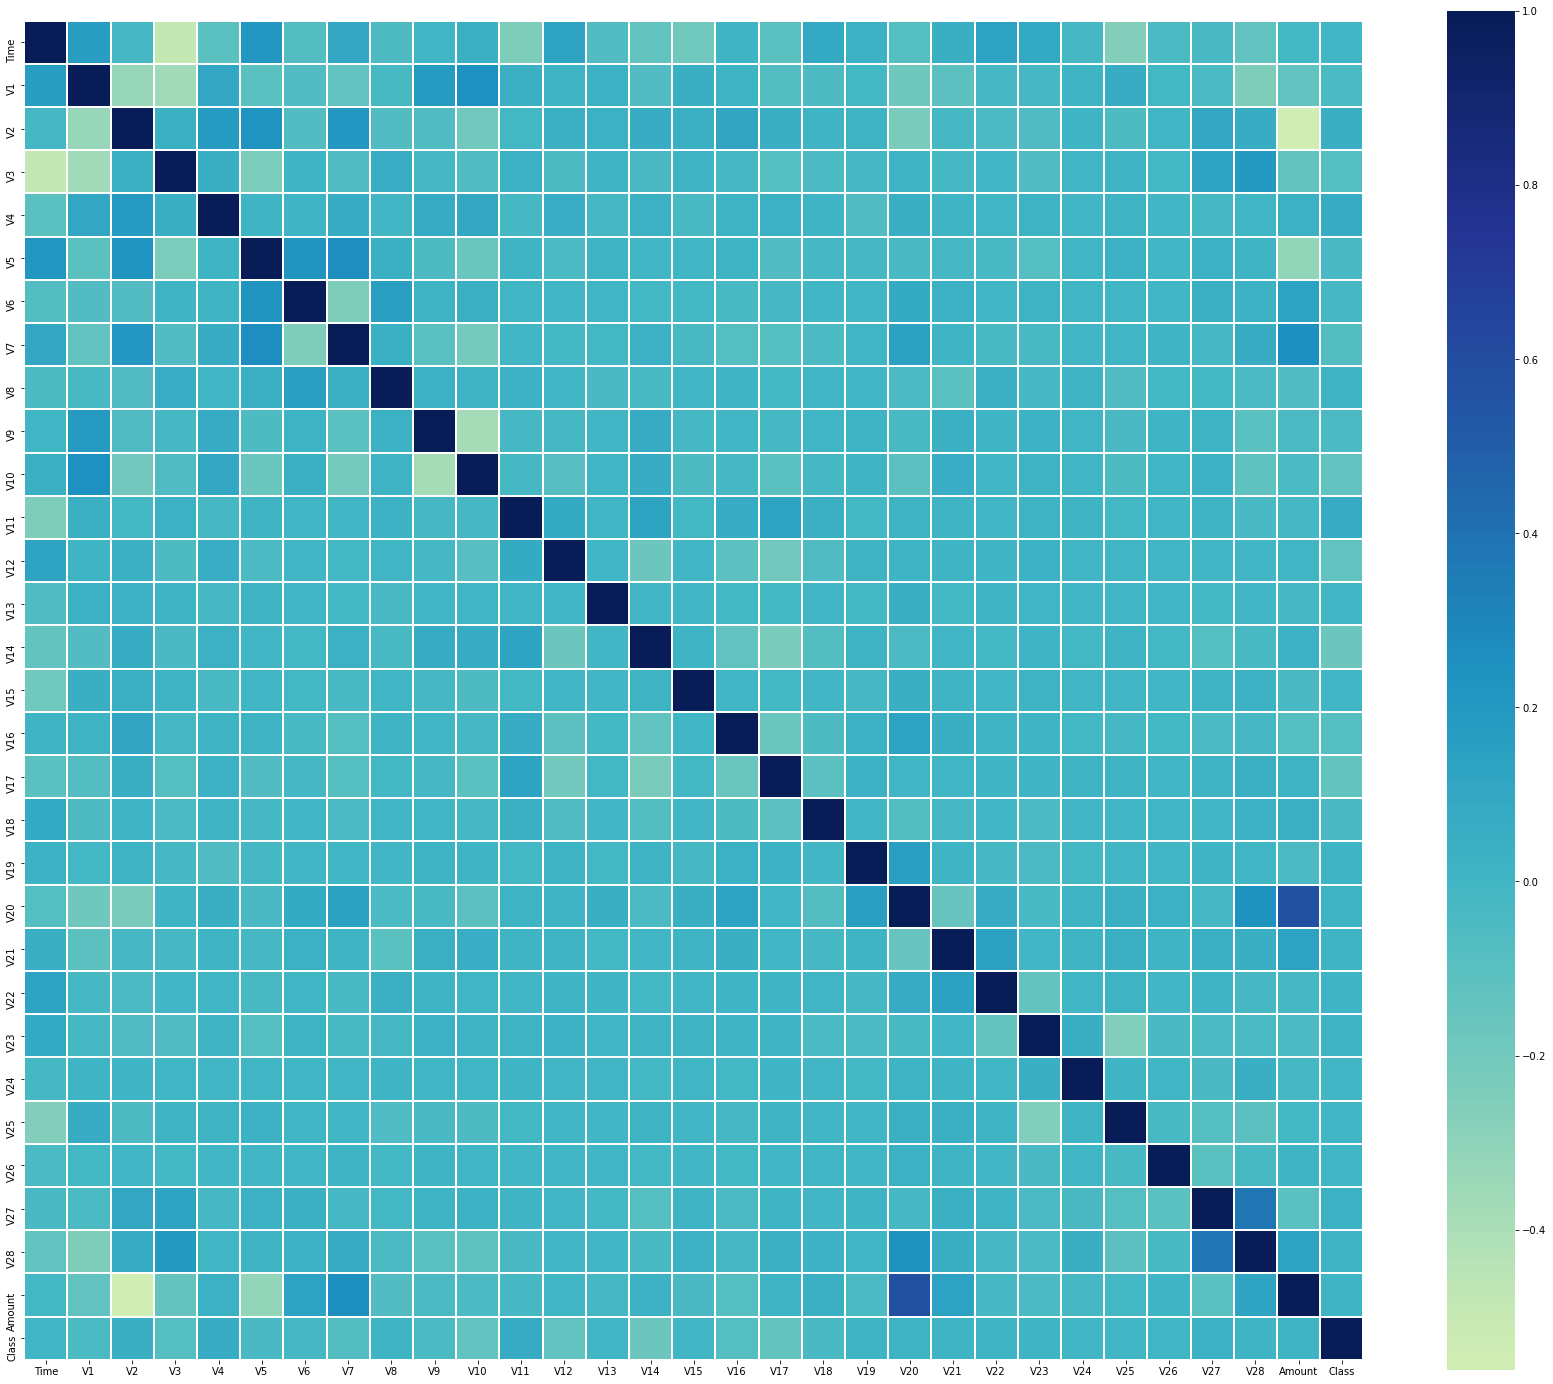

In [17]:
# EDA & VISUALIZATIONS

# Correlation Heatmap

f, ax = plt.subplots(figsize=(30, 25))
mat = new_df.corr('pearson')
sns.heatmap(mat, cmap='YlGnBu', vmax=1, center=0,# annot = True,
            square=True, linewidths=1)
plt.show()

In [18]:
plt.figure(figsize=(10,8)
           
x_axis = new_df.value_counts('V1')
y_axis = new_df.value_counts('Class')
           
sns.scatterplot(x,y, palette='pastel')
plt.title('Distribution of Amounts')
plt.xlabel('Amounts')
plt.ylabel('Counts')
plt.show()


SyntaxError: invalid syntax (<ipython-input-18-75ce48eacc78>, line 3)

<Figure size 432x288 with 0 Axes>

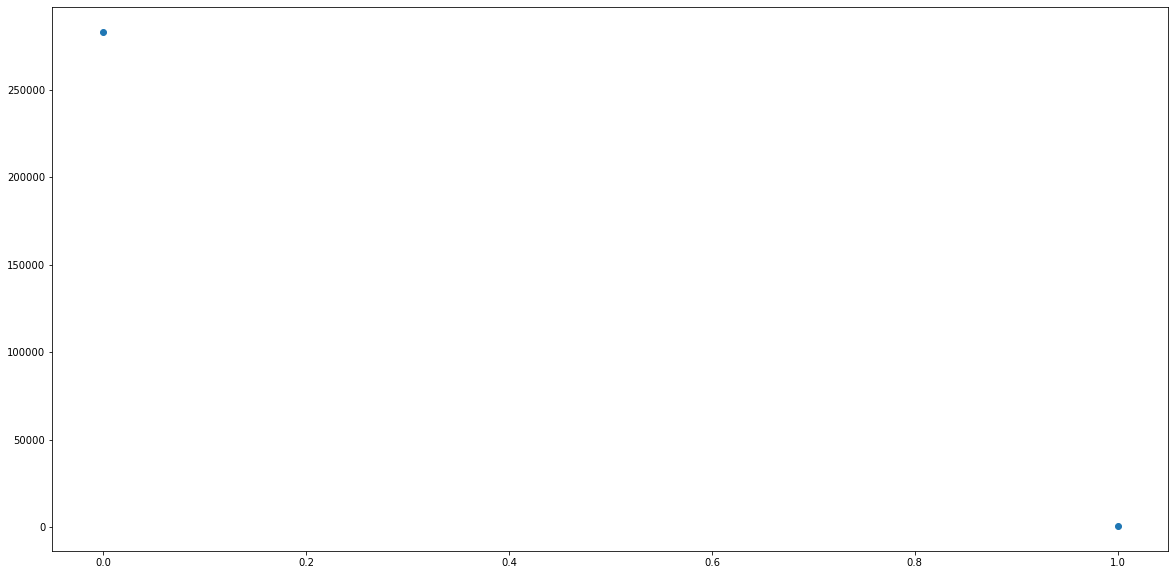

In [19]:
plt.clf()
plt.figure(figsize=(20,10))
plt.scatter(x_axis, y_axis)
plt.show()

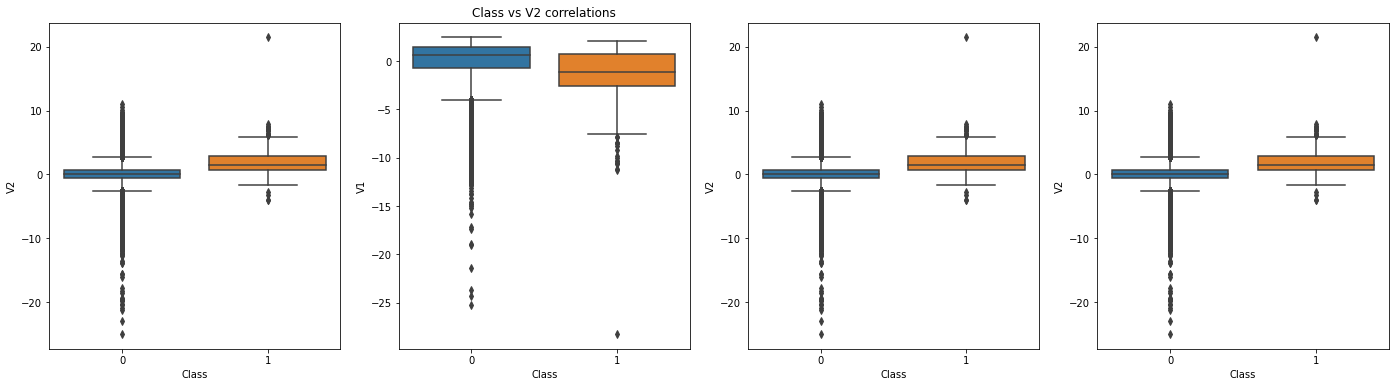

In [20]:
# Plotting features with an interesting correlation

f, axes = plt.subplots(ncols=4, figsize=(24,6))


sns.boxplot(x='Class', y='V1', data=new_df, ax=axes[1]) 
axes[1].set_title('Class vs V1 correlations')

sns.boxplot(x='Class', y='V2', data=new_df, ax=axes[2]) 
axes[1].set_title('Class vs V2 correlations')

sns.boxplot(x='Class', y='V2', data=new_df, ax=axes[3]) 
axes[1].set_title('Class vs V2 correlations')

sns.boxplot(x='Class', y='V2', data=new_df, ax=axes[0]) 
axes[1].set_title('Class vs V2 correlations') 


plt.show()

# Modeling woth Decision Tree Classifier

In [21]:
# Splitting the undersampled data

y = new_df['Class']
X = new_df.drop(['Class'], axis = 1)


# Splitting the data into Train & Test sets
from sklearn.model_selection import train_test_split

X_trains,X_tests,y_trains,y_tests = train_test_split(X, y,
                                               test_size = 0.2, 
                                               random_state = 1)


In [22]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model = model.fit(X_trains, y_trains)
y_preds = model.predict(X_tests)
print(y_preds.shape)
y_preds = pd.DataFrame(y_preds)

(50727,)


# Modeling KNeighbors Classifier for Prediction

In [23]:

from sklearn.neighbors import KNeighborsClassifier
knnr= KNeighborsClassifier(n_neighbors=3)
knnr = knnr.fit(X_train, y_train)
pred = knnr.predict(X_test)
print(pred.shape)

(141863,)


### MODELING

Now, let's see what we can do with our models! We will see the performances on the cleaned undersampled data and on the SMOTE oversampled data. For this part I decided to use a few different models:

**Supervised Learning**:

- *Logistic Regression*
- *Catboost Regressor*
        
**Unsupervised Learning**:

- *PCA*
- *TSNE*
- *Truncated SVD*

Let's start with supervised algorithms!

In [24]:
import time

from sklearn.manifold import TSNE
import matplotlib.patches as mpatches
from catboost import CatBoostClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split,RandomizedSearchCV

In [25]:
# Splitting the undersampled data

labels = new_df['Class']
new_df = new_df.drop(['Class'], axis = 1)

# Splitting the data into Train & Test sets

Xtrain,X_test,ytrain,y_test = train_test_split(new_df,labels,
                                               test_size = 0.1,
                                               stratify = labels,
                                               shuffle = True)
# Splitting the data into Train & valiation sets

X_train,X_val,y_train,y_val = train_test_split(Xtrain,ytrain,
                                               test_size = 0.1,
                                               stratify = ytrain,
                                               shuffle = True)

In [26]:
# LOGISTIC REGRRESSION (Undersampled data)

log_reg = LogisticRegression()
log_mod = log_reg.fit(X_train,y_train)
log_pred = log_mod.predict(X_val)

# Classification Report

print(classification_report(y_val, log_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     22807
           1       0.80      0.60      0.69        20

    accuracy                           1.00     22827
   macro avg       0.90      0.80      0.84     22827
weighted avg       1.00      1.00      1.00     22827



In [27]:
# CATBOOST CLASSIFIER (Undersampled data)

params = {'loss_function':'Logloss',
          'eval_metric':'BalancedAccuracy',
          #'cat_features': cat_features,
          'verbose': 200,
          'random_seed': 42
         }

cat = CatBoostClassifier(**params)
cat_model = cat.fit(X_train,y_train,
                     eval_set = (X_val,y_val),
                     use_best_model=True,
                     verbose = 0,
                     plot=True)

cat_pred = cat_model.predict(X_val)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [28]:
print(classification_report(y_val, cat_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     22807
           1       1.00      0.65      0.79        20

    accuracy                           1.00     22827
   macro avg       1.00      0.82      0.89     22827
weighted avg       1.00      1.00      1.00     22827



With Logistic Regression and Catboost Classifier, we got accuracy 1.00 but the recall and f1-score is 0.70 and 0.82.

# Evaluating Model of Prediction

In [29]:
from sklearn.metrics import confusion_matrix, classification_report

#Evaluatiing model
print('Accuracy training :', model.score(X_trains, y_trains))
print('Accuracy test :', model.score(X_tests, y_tests))

print('-'*50)
print('\nConfusion matrix :')
cm = confusion_matrix(y_tests, y_preds)
print(cm)

print('-'*50)
print('\nClassification report :')
cr = classification_report(y_tests, y_preds)
print(cr)

Accuracy training : 1.0
Accuracy test : 0.9993100321327892
--------------------------------------------------

Confusion matrix :
[[50669    23]
 [   12    23]]
--------------------------------------------------

Classification report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     50692
           1       0.50      0.66      0.57        35

    accuracy                           1.00     50727
   macro avg       0.75      0.83      0.78     50727
weighted avg       1.00      1.00      1.00     50727



In [30]:
class_names = ['not_fraud', 'fraud']
cm = confusion_matrix(y_test, y_pred)
# Create pandas dataframe
dataframe = pd.DataFrame(cm, index= data['Class'], columns= data['Class'])
# Create heatmap
sns.heatmap(dataframe, annot=True, cbar=None, cmap="Blues", fmt = 'g')
plt.title("Confusion Matrix"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

NameError: name 'y_pred' is not defined

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

#Evaluatiing model
print('Accuracy training :', knnr.score(X_train, y_train))
print('Accuracy test :', knnr.score(X_test, y_test))

print('-'*50)
print('\nConfusion matrix :')
cm = confusion_matrix(y_test, y_pred)
print(cm)

print('-'*50)
print('\nClassification report :')
cr = classification_report(y_test, y_pred)
print(cr)

In [ ]:
predict_fraud = np.array([406, -2.312226542, 1.951992011, -1.609850732, 3.997905588, -0.522187865, -1.426545319, -2.537387306, 1.391657248, -2.770089277, -2.772272145, 3.202033207, -2.899907388, -0.595221881, -4.289253782, 0.38972412, -1.14074718, -2.830055675, -0.016822468, 0.416955705, 0.126910559, 0.517232371, -0.035049369, -0.465211076, 0.320198199, 0.044519167, 0.177839798, 0.261145003, -0.143275875, 0]).reshape(1,-1)
preds = model.predict(predict_fraud)

preds